# Figure 5 script

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from scipy.stats import pearsonr

In [2]:
jakob_acn = pd.read_csv('../_Jakob2023/3_Arctic_Canada_North.csv')
jakob_acn_yearstart = jakob_acn.iloc[[5, 17, 29, 41, 53, 65, 77, 89, 101, 113], :]
jakob_yrs = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
jakob_acn_massbalance = np.diff(jakob_acn_yearstart['mass_changes'])
jakob_acs = pd.read_csv('../_Jakob2023/4_Arctic_Canada_South.csv')
jakob_acs_yearstart = jakob_acs.iloc[[5, 17, 29, 41, 53, 65, 77, 89, 101, 113], :]
jakob_acs_massbalance = np.diff(jakob_acs_yearstart['mass_changes'])

In [3]:
subglacial_event_acn_yrs = [2016, 2015, 2011, 2015, 2020, 2020, 2015, 2016, 2012, 2020, 2017, 2015, 
        2020, 2014, 2019, 2020, 2016, 2020, 2019, 2019, 2020, 2019, 2019, 2019, 2016, 2014, 2017, 2019, 
        2020, 2016, 2013, 2015, 2019, 2015, 2019, 2019]
subglacial_event_acs_yrs = [2013, 2016, 2020, 2012, 2015, 2019, 
        2021, 2015, 2013, 2013, 2015, 2019, 2020]

# se_bins, se_counts = np.unique(subglacial_event_yrs, return_counts=True)

In [4]:
acn_counts = np.bincount(subglacial_event_acn_yrs)
acn_counts = acn_counts[2011:2021]
acs_counts = np.bincount(subglacial_event_acs_yrs)
acs_counts = acs_counts[2011:2021]
yrs = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [12]:
print(acn_counts)
print(jakob_acn_massbalance)
print(pearsonr(acn_counts[1:-1], jakob_acn_massbalance[1:]))
print(pearsonr(acs_counts[1:-1], jakob_acs_massbalance[1:]))
print(pearsonr(acn_counts[1:-1] + acs_counts[1:-1], jakob_acn_massbalance[1:] + jakob_acs_massbalance[1:]))

[ 1  1  1  2  6  5  2  0 10  8]
[-89.54028339 -59.9952916    8.1741751  -25.0144856  -50.8451774
 -17.0521138   17.419034    -2.5975914  -47.9920053 ]
PearsonRResult(statistic=-0.49381345103356344, pvalue=0.21360987245136417)
PearsonRResult(statistic=-0.1731360818349501, pvalue=0.6817989374291811)
PearsonRResult(statistic=-0.555329173841212, pvalue=0.15302519058679653)


In [67]:
axes_settings = {'linewidth'   : 1.5}
mpl.rc('axes', **axes_settings)
font_settings = {'size'   : 13}
mpl.rc('font', **font_settings)

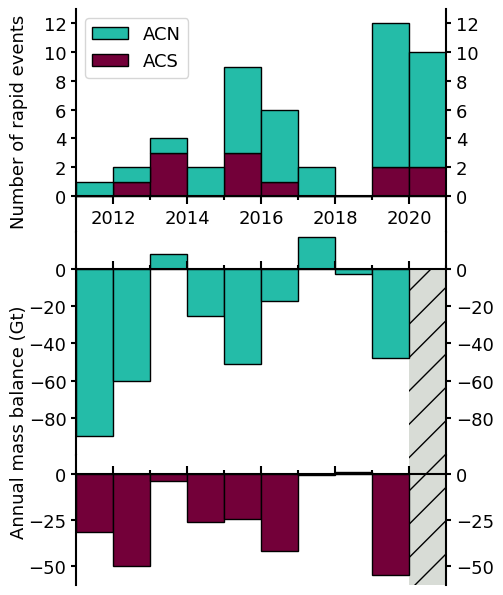

In [130]:
bottom = np.zeros(10)

c_acn = 'xkcd:tealish'
c_acs = 'xkcd:merlot'

labelx = -0.13

fig, axs = plt.subplots(3, 1, figsize=(5, 6), sharex=True, gridspec_kw={'height_ratios': [1, 1, 0.583]})
# fig, axs = plt.subplots(3, 1, figsize=(7, 7), sharex=True)
fig.subplots_adjust(hspace=0, left=0.16, top=0.98, bottom=0.02)
acs_h = axs[0].bar(yrs, acs_counts, width=1, align='edge', edgecolor='k', bottom=bottom, color=c_acs, label='ACS')
bottom += acs_counts
acn_h = axs[0].bar(yrs, acn_counts, width=1, align='edge', edgecolor='k', bottom=bottom, color=c_acn, label='ACN')
axs[0].spines["bottom"].set_position(("data", 0))
axs[0].spines["top"].set_visible(False)
axs[0].set_xlim(2011, 2021)
axs[0].set_ylim(-2.5, 13)
axs[0].set_ylabel('Number of rapid events')
axs[0].yaxis.set_label_coords(labelx, 0.5)
ticks_pos_1 = [0, 2, 4, 6, 8, 10, 12]
# axs[1].set_yticks(ticks_pos, labels=[str(i) for i in ticks_pos])
axs[0].set_yticks(ticks_pos_1)
axs[0].xaxis.set_minor_locator(MultipleLocator(1))
axs[0].tick_params(labelbottom=True, right=True, labelright=True, width=1.5)
axs[0].tick_params(axis='x', length=6)
axs[0].tick_params(axis='x', which='minor', width=1.5, length=3)
axs[0].legend([acn_h, acs_h], ['ACN', 'ACS'])

axs[1].bar(2020, -140, width=1, align='edge', color='xkcd:light grey', hatch='/')
axs[1].bar(jakob_yrs, jakob_acn_massbalance, width=1, align='edge', edgecolor='k', color=c_acn)
axs[1].set_xlim(2011, 2021)
axs[1].spines["bottom"].set_position(("data", 0))
axs[1].spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
axs[1].set_ylim(-100, 20)
axs[1].set_ylabel('Annual mass balance (Gt)')
axs[1].yaxis.set_label_coords(labelx, 0.15)
ticks_pos_2 = [-80, -60, -40, -20, 0]
# axs[1].set_yticks(ticks_pos_2, labels=[str(i) for i in ticks_pos])
axs[1].set_yticks(ticks_pos_2)
axs[1].tick_params(right=True, labelright=True, width=1.5)
axs[1].tick_params(axis='x', direction='in', length=6)
axs[1].tick_params(axis='x', which='minor', direction='in', width=1.5, length=3)

axs[2].bar(2020, 30, width=1, align='edge', color='xkcd:light grey', hatch='/')
axs[2].bar(2020, -90, width=1, align='edge', color='xkcd:light grey', hatch='/')
axs[2].bar(jakob_yrs, jakob_acs_massbalance, width=1, align='edge', edgecolor='k', color=c_acs)
axs[2].set_xlim(2011, 2021)
axs[2].spines["bottom"].set_position(("data", 0))
axs[2].spines["top"].set_visible(False)
# axs[2].get_xaxis().set_visible(False)

axs[2].set_ylim(-60, 10)

axs[2].tick_params(labelbottom=False, right=True, labelright=True, width=1.5)
axs[2].tick_params(axis='x', direction='in', length=6)
axs[2].tick_params(axis='x', which='minor', direction='in', width=1.5, length=3)

fig.savefig('frequency_vs_massbalance.pdf', dpi=150)
fig.savefig('frequency_vs_massbalance.png', dpi=150)